<a href="https://colab.research.google.com/github/itisdavid/DS3001_labs/blob/main/04_hedonic_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge


df = pd.read_csv('pierce_county_house_sales.csv')

df.dropna(inplace=True)
print(df.describe())  # print summary of statistical characteristics of dataset
print(df.info())  # print info on the dataset

         sale_price  house_square_feet  attic_finished_square_feet  \
count  7.000000e+00           7.000000                    7.000000   
mean   6.538210e+05        2391.428571                   36.000000   
std    3.820270e+05        1140.296432                   95.247047   
min    1.592470e+05        1107.000000                    0.000000   
25%    4.462500e+05        1276.000000                    0.000000   
50%    4.750000e+05        2752.000000                    0.000000   
75%    9.125000e+05        3274.500000                    0.000000   
max    1.225000e+06        3780.000000                  252.000000   

       basement_square_feet  attached_garage_square_feet  \
count              7.000000                     7.000000   
mean             867.000000                   676.000000   
std             1062.722134                   425.079208   
min                0.000000                     0.000000   
25%                0.000000                   413.500000   
50%      

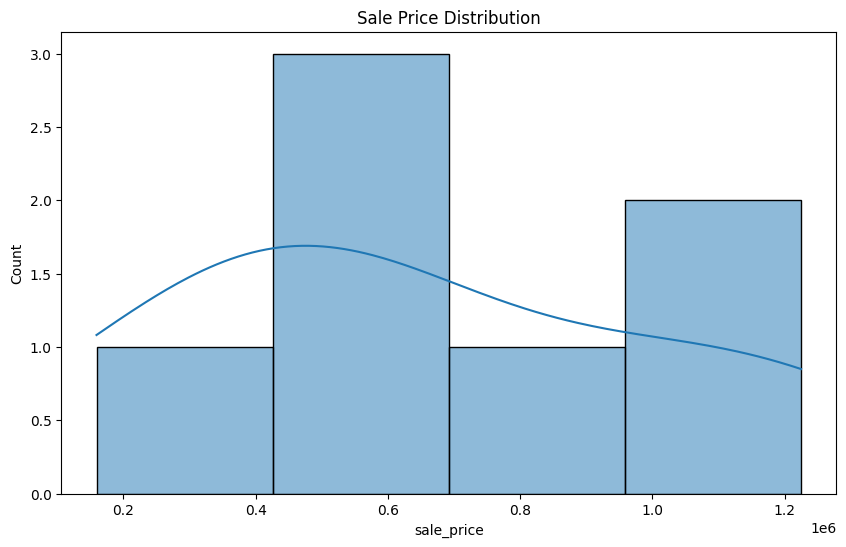

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sale_price'], kde=True)
plt.title('Sale Price Distribution')
plt.show()

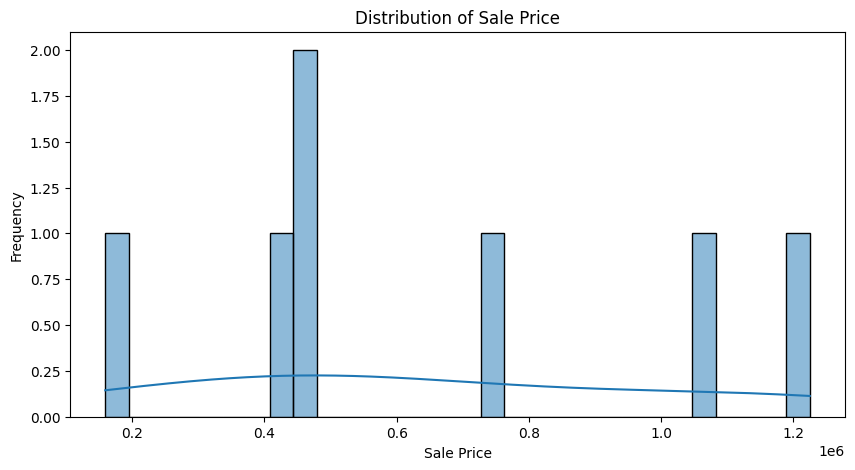

In [ ]:
# Drop 'waterfront_type' and 'view_quality' columns due to high number of missing values
df.drop(['waterfront_type', 'view_quality'], axis=1, inplace=True)
plt.figure(figsize=(10, 5))

sns.histplot(df['sale_price'], kde=True, bins=30)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

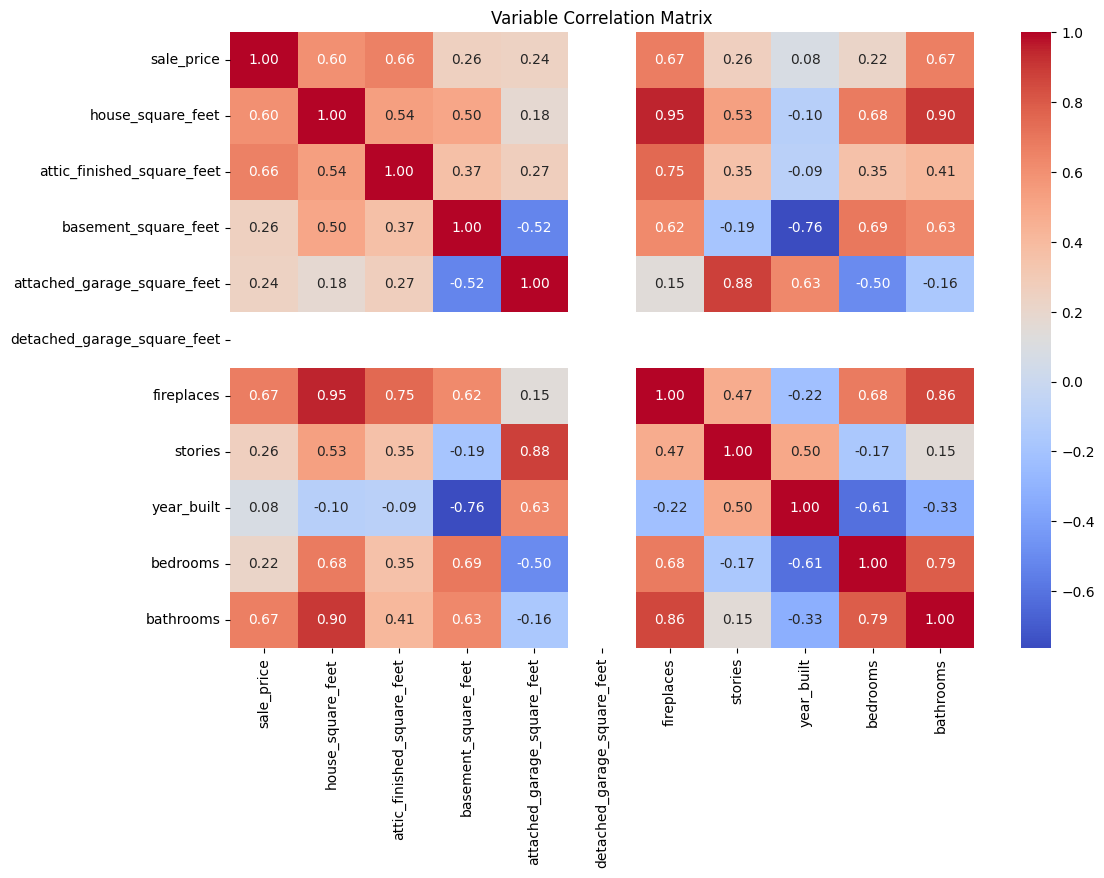

In [ ]:
correlation_matrix = df.select_dtypes(include=np.number).corr()  # grab numerical variables

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Variable Correlation Matrix")
plt.show()

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('sale_price')
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

x = df.drop(columns=['sale_price'])
y = df['sale_price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train RMSE for Model: {train_rmse}")
print(f"Test RMSE for Model: {test_rmse}")

Train RMSE for Model: 3.2720783079404376e-10
Test RMSE for Model: 407350.68139481347


In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)
y_train_poly_pred = ridge_model.predict(X_train_poly)
y_test_poly_pred = ridge_model.predict(X_test_poly)
train_rmse_poly = np.sqrt(mean_squared_error(y_train, y_train_poly_pred))
test_rmse_poly = np.sqrt(mean_squared_error(y_test, y_test_poly_pred))

print(f"Train RMSE for Complex Model: {train_rmse_poly}")
print(f"Test RMSE for Complex Model: {test_rmse_poly}")

Train RMSE for Complex Model: 15389.668404281781
Test RMSE for Complex Model: 660449.0904903352


Looking at the results of the sample and complex models, the simple model fits the training data very well with a RMSE value of 3.76E-10 but the complex model shows signs of overfitting in the training data. The model could be too complex for the Pierce Country House Sales dataset, resulting in this overfitting. In addition, the RMSE for the test set for both models seem to be relatively high, meaning the models don't accurately predict the values of the model.